In [9]:
!pip install plotly
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


['Team', 'Season', 'W/L%', 'Injury_Count_x', 'Pace', 'OPtg', 'DRtg', 'Year', 'Injury_Count_y']


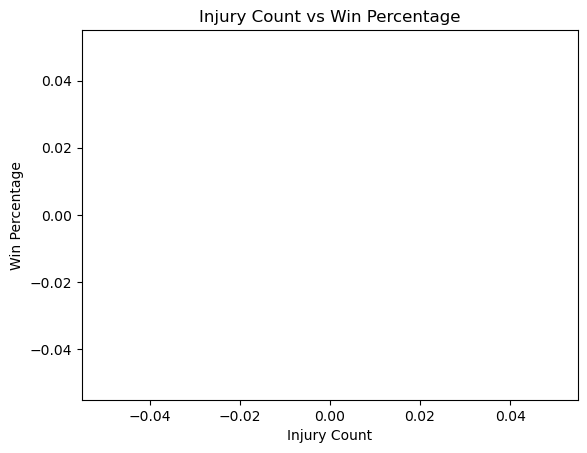

In [18]:
# Step 1: Load and Clean Data
def load_injury_data(filepath):
    '''
    Takes in filepath to injury data and returns cleaned DataFrame with columns, 'Player', 
    'Team', 'Date', 'Return Date', and 'Injury'.
    '''
    df = pd.read_csv(filepath)
    df = df.rename(columns={'Relinquished': 'Player', 'Notes': 'Injury'})
    df = df[['Player', 'Team', 'Date', 'Injury']]
    df['Season'] = [int(date[:4]) for date in df['Date']]
    return df

def load_team_stats(filepath):
    '''
    Takes in filepath to team stats data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', and 'W-PCT'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Season', 'W/L%']] 
    df['Season'] = [int(season[:4]) for season in df['Season']]
    return df

def load_team_performance(filepath):
    '''
    Takes in filepath to team performance data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', 'BENCH_PTS', and 'BENCH_MIN'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Year', 'Pace', 'OPtg', 'DRtg']]
    df['Season'] = df['Year']
    df = df.drop(columns=['Year'])
    return df

def compute_injury_counts_by_team_year(filepath):
    '''
    Loads NBA injury data and returns a DataFrame showing injury counts per team per year.
    '''
    df = pd.read_csv(filepath)
    df = df[['Date', 'Team', 'Relinquished']]
    df = df[[type(date) != float and type(team) != float for date, team in zip(df['Date'], df['Team'])]]
    df['Year'] = df['Date'].str.slice(0, 4).astype(int)
    injury_counts = df.groupby(['Team', 'Year']).size().reset_index(name='Injury_Count')

    return injury_counts

# Load Data
injuries_df = load_injury_data('data/nba_injuries.csv')
team_stats = load_team_stats('data/Team_Records.csv')
team_perf = load_team_performance('data/advanced_stats_total.csv')
injury_counts = compute_injury_counts_by_team_year("data/nba_injuries.csv")

# Step 2: Merge Datasets
def merge_datasets(injuries_df, stats_df, bench_df):
    injuries_count = injuries_df.groupby(['Team', 'Season']).size().reset_index(name='Injury_Count')
    merged = stats_df.merge(injuries_count, on=['Team', 'Season'], how='left')
    merged = merged.merge(bench_df, on=['Team', 'Season'], how='left')
    
    stats_df['Season'] = [int(season) for season in stats_df['Season']]
    merged = merged.merge(injury_counts, left_on=['Team', 'Season'], right_on=['Team', 'Year'], how='left')
    
    return merged

merged_df = merge_datasets(injuries_df, team_stats, team_perf)

print(merged_df.columns.tolist())

def plot_injury_vs_win_pct(df):
    avg = df.groupby('Team')[['Injury_Count_x','W/L%']].mean().dropna()
    
    plot = sns.scatterplot(data=avg, x='Injury_Count_x', y='W/L%')
    plot.set(xlabel='Injury Count', ylabel='Win Percentage', title='Injury Count vs Win Percentage')
    plt.show()

plot_injury_vs_win_pct(merged_df)

In [ ]:
team_name_mapping = {'76ers': 'Philadelphia 76ers',
                     'Bucks': 'Milwaukee Bucks', 
                     'Bulls': 'Chicago Bulls',
                     'Cavaliers': 'Cleveland Cavaliers',
                     'Celtics': 'Boston Celtics',
                     'Clippers': 'Los Angeles Clippers',
                     'Grizzlies': 'Memphis Grizzlies',
                     'Hawks': 'Atlanta Hawks',
                     'Heat': 'Miami Heat',
                     'Hornets': 'Charlotte Hornets',
                     'Jazz': 'Utah Jazz',
                     'Kings': 'Sacramento Kings',
                     'Knicks': 'New York Knicks',
                     'Lakers': 'Los Angeles Lakers',
                     'Magic': 'Orlando Magic',
                     'Mavericks': 'Dallas Mavericks',
                     'Nets': 'Brooklyn Nets',
                     'Nuggets': 'Denver Nuggets',
                     'Pacers': 'Indiana Pacers',
                     'Pelicans': 'New Orleans Pelicans',
                     'Pistons': 'Detroit Pistons',
                     'Raptors': 'Toronto Raptors',
                     'Rockets': 'Houston Rockets',
                     'Spurs': 'San Antonio Spurs',
                     'Suns': 'Phoenix Suns',
                     'Thunder': 'Oklahoma City Thunder',
                     'Timberwolves': 'Minnesota Timberwolves',
                     'Trail Blazers': 'Portland Trail Blazers',
                     'Warriors': 'Golden State Warriors',
                     'Wizards': 'Washington Wizards',
                     'Atlanta Hawks*': 'Atlanta Hawks',
                     'Boston Celtics*': 'Boston Celtics',
                     
                     'Baltimore Bullets': 'Washington Wizards',
                     'Baltimore Bullets*': 'Washington Wizards',
                     'Bullets': 'Washington Wizards',
                     'New Jersey Nets': 'Brooklyn Nets',
                     'New Orleans Hornets': 'New Orleans Pelicans',
                     'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans',
                     'Seattle SuperSonics': 'Oklahoma City Thunder',
                     'San Diego Clippers': 'Los Angeles Clippers',
                     'Vancouver Grizzlies': 'Memphis Grizzlies',
                     'Charlotte Bobcats': 'Charlotte Hornets',
                     'New Orleans Jazz': 'Utah Jazz',
                     'Kansas City Kings': 'Sacramento Kings',
                     'Cincinnati Royals': 'Sacramento Kings',
                     'St. Louis Hawks': 'Atlanta Hawks',
                     'Washington Bullets': 'Washington Wizards',
                     'Fort Wayne Pistons': 'Detroit Pistons',
                     'Minneapolis Lakers': 'Los Angeles Lakers',
                     'Buffalo Braves': 'Los Angeles Clippers',
                     'Braves': 'Los Angeles Clippers',
                     'Bobcats': 'Charlotte Hornets',
                     'Blazers': 'Portland Trail Blazers'}

injuries_df['Team'] = injuries_df['Team'].map(team_name_mapping)
team_stats_df['Team'] = team_stats_df['Team'].map(team_name_mapping)
team_perf_df['Team'] = team_perf_df['Team'].map(team_name_mapping)